In [1]:
import pandas as pd

In [2]:
df_genderclass = pd.read_csv("resources/resources/gender_classification_v7.csv");
df_genderclass.head() # Verileri okuduk

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [3]:
df_genderclass.info() # veriler hakkında bilgi sahibi olduk

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [4]:
df_genderclass.isna().sum() # hiçbir null alan yok 

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [5]:
import seaborn as sns # grafiklerimizi çizebilmek için gerekli kütüphaneleri import ettik.
import matplotlib.pyplot as plt
df_graph = pd.DataFrame({
        "Saç Uzunluğu":df_genderclass["long_hair"].value_counts().index,
        "Uzunluğa Göre Miktarı":df_genderclass["long_hair"].value_counts().values
})
df_graph=df_graph.set_index(keys="Saç Uzunluğu",drop=False).sort_index()
df_graph

,Saç Uzunluğu,Uzunluğa Göre Miktarı
Saç Uzunluğu,,
0,0,652
1,1,4349


<AxesSubplot: title={'center': 'Saç Uzunluğu Dağılımı'}, xlabel='Saç Uzunluğu', ylabel='Uzunluğa Göre Miktarı'>

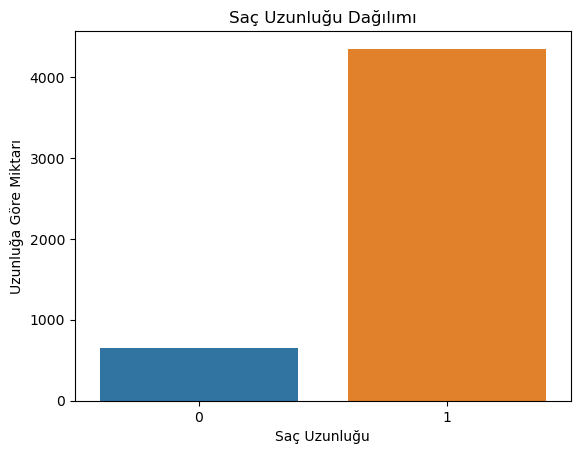

In [6]:
plt.title("Saç Uzunluğu Dağılımı")
sns.barplot(data=df_graph,x="Saç Uzunluğu",y="Uzunluğa Göre Miktarı")
# grafikten de görüldüğü üzere imbalanced datasetimiz var veri kaybı yaşamamak için 0 ı arttıracağız

In [7]:
df_genderclass = df_genderclass.join(pd.get_dummies(df_genderclass["gender"]))

In [8]:
df_genderclass.drop("gender",axis=1,inplace=True) # sözel verileri içeren sütunumuzu drop ettik.

In [9]:
y = df_genderclass["long_hair"]
X = df_genderclass.drop("long_hair",axis=1)

In [10]:
from imblearn.over_sampling import RandomOverSampler #varolan verileri kullanarak yeni verileri üretmemizi sağlar
from collections import Counter

In [11]:
sampler = RandomOverSampler()
X_new,y_new = sampler.fit_resample(X,y) #imbalanced dataset sorununu çözmüş olduk
print(f"Eski Durum: {Counter(y)}")
print(f"Yeni Durum:{Counter(y_new)}")

Eski Durum: Counter({1: 4349, 0: 652})
Yeni Durum:Counter({1: 4349, 0: 4349})


<AxesSubplot: >

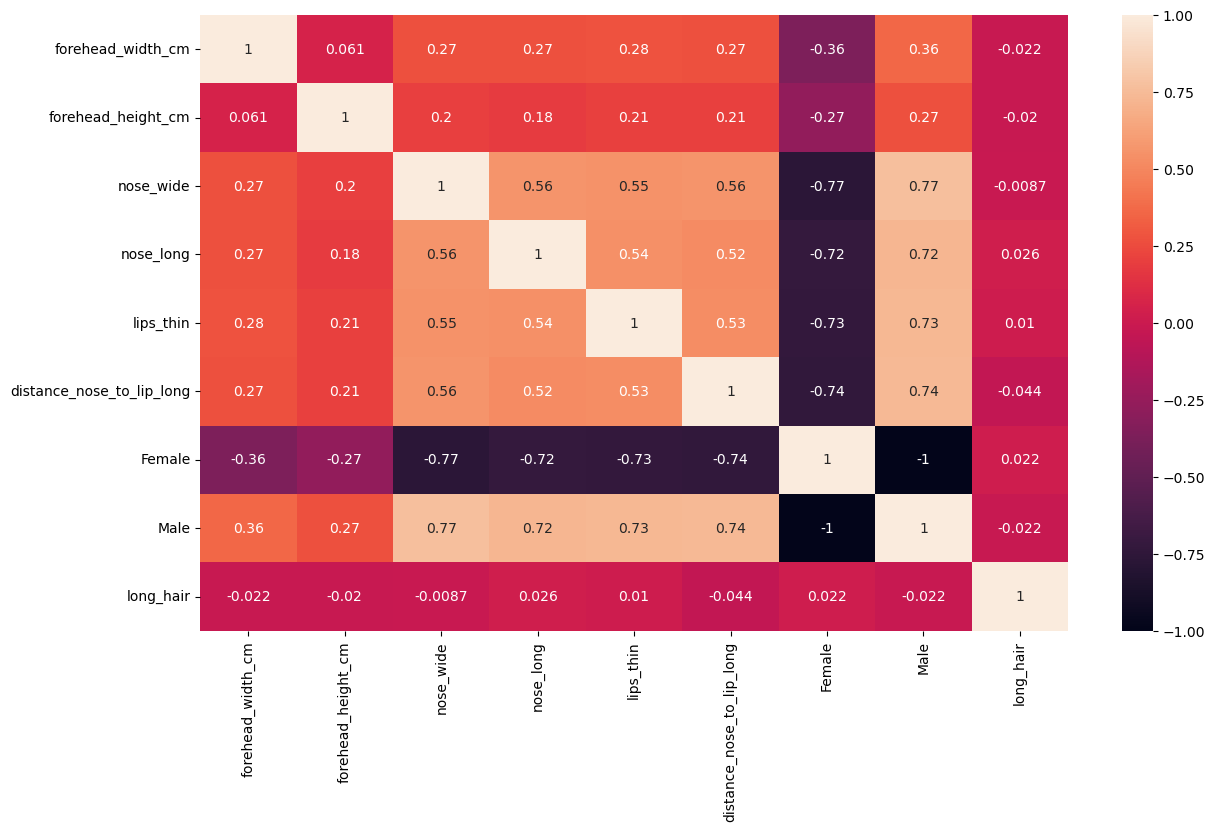

In [12]:
df_genderclass = X_new.join(y_new)
plt.figure(figsize=(14,8))
sns.heatmap(df_genderclass.corr(),annot=True)

In [13]:
from sklearn.model_selection import train_test_split #verilerimizi train ve test olarak böleceğiz

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X_new,y_new,test_size=0.2,random_state=42) # test ve train verilerimizi oluşturuyoruz

In [15]:
from sklearn.tree import DecisionTreeClassifier # modelimizi eğitmek için sınnıflandırma yöntemi kullanıyoruz
from sklearn.metrics import accuracy_score,confusion_matrix
#alt küme doğruluğu ve karmaşıklık matrisi doğruluğu kullanacağız

In [16]:
model_tree = DecisionTreeClassifier()
model_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [17]:
print(f"Train accuracy score={accuracy_score(y_train,model_tree.predict(X_train))}")
print(f"Test accuracy score={accuracy_score(y_test,model_tree.predict(X_test))}")

Train accuracy score=0.9182236274791606
Test accuracy score=0.882183908045977


[Text(0.5217035548050458, 0.98, 'X[5] <= 0.5\ngini = 0.5\nsamples = 6958\nvalue = [3475, 3483]'),
 Text(0.3957214505579808, 0.94, 'X[1] <= 6.95\ngini = 0.499\nsamples = 3396\nvalue = [1618, 1778]'),
 Text(0.34599861420296724, 0.9, 'X[1] <= 6.25\ngini = 0.498\nsamples = 3328\nvalue = [1569, 1759]'),
 Text(0.2973110214096091, 0.86, 'X[0] <= 15.15\ngini = 0.5\nsamples = 2660\nvalue = [1293, 1367]'),
 Text(0.2963851222747461, 0.82, 'X[0] <= 14.05\ngini = 0.5\nsamples = 2642\nvalue = [1293, 1349]'),
 Text(0.2388742345960765, 0.78, 'X[1] <= 6.15\ngini = 0.499\nsamples = 2306\nvalue = [1095, 1211]'),
 Text(0.1681220116243743, 0.74, 'X[0] <= 13.55\ngini = 0.497\nsamples = 2074\nvalue = [959, 1115]'),
 Text(0.07350567655739128, 0.7, 'X[0] <= 11.55\ngini = 0.499\nsamples = 1720\nvalue = [815, 905]'),
 Text(0.010879314834640202, 0.66, 'X[0] <= 11.45\ngini = 0.467\nsamples = 148\nvalue = [55, 93]'),
 Text(0.006018344376609473, 0.62, 'X[1] <= 5.45\ngini = 0.499\nsamples = 88\nvalue = [46, 42]'),
 T

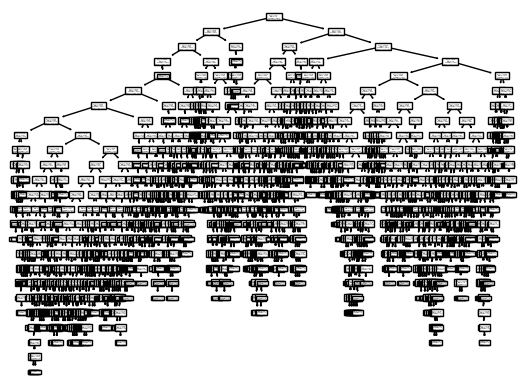

In [18]:
from sklearn import tree #aşırı öğrenme olup olmadığı için karar ağacını çizdireceğiz
tree.plot_tree(model_tree) #aşağıda görüldüğü üzere ağaç okunmuyor ve aşırı öğrenme söz konusu 
# bu yüzden ağacı budayacağız ve aşırı öğrenmeyi engellemeye çalışacağız

In [19]:
path = model_tree.cost_complexity_pruning_path(X_train,y_train) # her bir dallanma için kullanılan alpha değerleri almış olduk
alphas = path["ccp_alphas"] # min maliyet karmaşıklık budaması için kullanılan karmaşıklık parametresi

In [20]:
accuracy_train, accuracy_test = [],[] #bunlar dizi
for i in alphas:
    model_prune = DecisionTreeClassifier(ccp_alpha=i)
    model_prune.fit(X_train,y_train) # budanmış modelimizi eğittik
    y_train_pred = model_prune.predict(X_train)
    #X_train verileriyle y_traini tahmin ettirdik
    y_test_pred = model_prune.predict(X_test)
    #X_test verileriyle Y_testi tahmin ettiriyoruz
    accuracy_train.append(accuracy_score(y_train,y_train_pred))
    accuracy_test.append(accuracy_score(y_test,y_test_pred))
    #doğruluk skorlarını train ve test veriler içinde kaydediyoruz

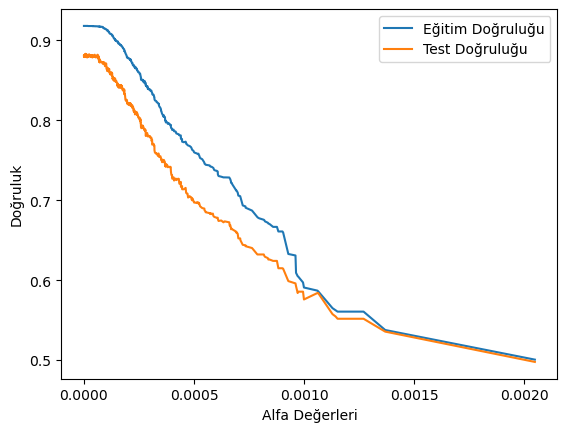

In [21]:
#lineplotla eğitim ve test verilerinin doğruluk dizilerinin çizgi grafiğini çizdiriyoruz
sns.lineplot(y=accuracy_train,x=alphas,label='Eğitim Doğruluğu')
sns.lineplot(y=accuracy_test,x=alphas,label='Test Doğruluğu')
# x ve y eksenlerinin isimlerini belirtmek için xlabel() .ylabel() kullandık
plt.xlabel("Alfa Değerleri")
plt.ylabel("Doğruluk")
plt.xticks()
plt.show()
# bu iki grafiğin paralel olmaya başladığı nokta ccp_alpha için en doğru değerdir

In [45]:
# göz kararı olarak 0.0014 alabilir ve modelimizi yeniden eğitebiliriz
model_tree_new = DecisionTreeClassifier(ccp_alpha=0.0011)
model_tree_new.fit(X_train,y_train) # modeli eğitme işlemini ccp_alpha değeriyle tekrardan yaptık

DecisionTreeClassifier(ccp_alpha=0.0011)

In [46]:
print(f"Train accuracy score={accuracy_score(y_train,model_tree_new.predict(X_train))}")
print(f"Test accuracy score={accuracy_score(y_test,model_tree_new.predict(X_test))}")
#Görüldüğü üzere doğruluk payı birbirine çok yakın ve gerçekçi çıktığı için aşırı öğrenme yok deriz
#Fakat Doğruluk skorumuz oldukça kötü geldi 

Train accuracy score=0.5860879563092842
Test accuracy score=0.5839080459770115


[Text(0.5119047619047619, 0.9545454545454546, 'X[5] <= 0.5\ngini = 0.5\nsamples = 6958\nvalue = [3475, 3483]'),
 Text(0.3333333333333333, 0.8636363636363636, 'X[1] <= 6.95\ngini = 0.499\nsamples = 3396\nvalue = [1618, 1778]'),
 Text(0.23809523809523808, 0.7727272727272727, 'X[1] <= 6.25\ngini = 0.498\nsamples = 3328\nvalue = [1569, 1759]'),
 Text(0.19047619047619047, 0.6818181818181818, 'X[0] <= 15.15\ngini = 0.5\nsamples = 2660\nvalue = [1293, 1367]'),
 Text(0.14285714285714285, 0.5909090909090909, 'X[0] <= 14.05\ngini = 0.5\nsamples = 2642\nvalue = [1293, 1349]'),
 Text(0.09523809523809523, 0.5, 'X[1] <= 6.15\ngini = 0.499\nsamples = 2306\nvalue = [1095, 1211]'),
 Text(0.047619047619047616, 0.4090909090909091, 'gini = 0.497\nsamples = 2074\nvalue = [959, 1115]'),
 Text(0.14285714285714285, 0.4090909090909091, 'X[0] <= 13.35\ngini = 0.485\nsamples = 232\nvalue = [136, 96]'),
 Text(0.09523809523809523, 0.3181818181818182, 'gini = 0.458\nsamples = 211\nvalue = [136, 75]'),
 Text(0.19047

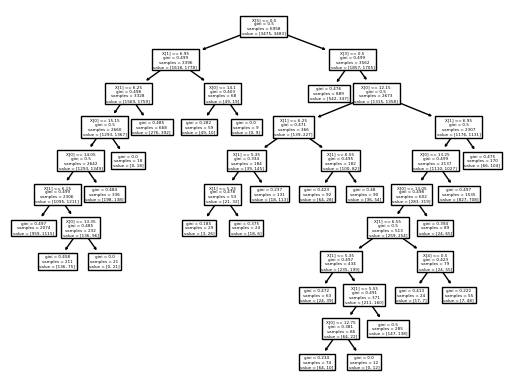

In [47]:
tree.plot_tree(model_tree_new)
#karar ağacı yapısı çok daha net okunabiliyor gözlemlendiği gibi

<AxesSubplot: >

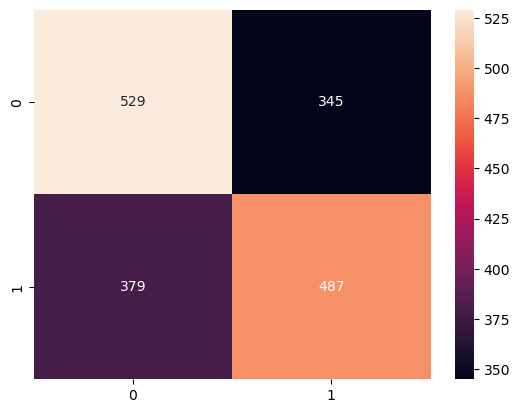

In [48]:
sns.heatmap(confusion_matrix(y_test,model_tree_new.predict(X_test)),annot=True,fmt='g')
#529 + 487 / 1740 = 0.5839 test verilerin doğruluk oranı confusion_matrix yöntemi ile bu şekilde çıktı

In [49]:
len(y_test)

1740

In [50]:
model_tree_new.predict(X_test) # Modelin tahmin ettiği veriler

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [51]:
y_test #gerçek değerler

7581    0
3909    1
6560    0
675     1
1253    1
       ..
5224    0
6729    0
7563    0
26      1
6583    0
Name: long_hair, Length: 1740, dtype: int64